## BrawlData

Analisi dei personaggi (leggende) del videogioco Brawlhalla e costruire un modello capace di individuare quali caratteristiche possono rendere più forti una leggenda

Fonti: Unione tra un file csv preso da https://www.kaggle.com/datasets/patrickgomes/brawlhalla-dataset/data e dati presi da https://www.stats.brawlhalla.fr/legend. 

#####  Importa le varie librerie

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


####    Caricamento dataframe

In [2]:
df = pd.read_csv ('legends_updated.csv')

In [3]:
df.head()

,Legend,Weapon1,Weapon2,Strength,Dexterity,Defense,Speed,Winrate Ranked,Winrate Unranked,Playrate,Kills,Deaths,Suicides,Damage Dealt,Damage Taken
0,Ada,blasters,spear,6,7,3,6,55.35%,57.47%,0.97%,2.46,2.11,0.13,465.85,405.93
1,Arcadia,spear,greatsword,7,7,4,4,53.59%,59.06%,0.78%,2.50,2.08,0.11,511.42,401.41
2,Artemis,rocket_lance,scythe,5,5,4,8,55.07%,57.13%,1.06%,2.37,2.10,0.19,438.09,393.16
3,Asuri,katars,sword,4,7,5,6,52.47%,57.17%,1.00%,2.37,2.09,0.17,433.23,397.43
4,Azoth,bow,axe,7,5,6,4,55.43%,59.50%,0.94%,2.46,2.05,0.14,478.21,394.94


####    Elimino colonne poco interessanti con l'analisi che si vuole effetuare

In [4]:
col = ['Winrate Unranked']
df_cleaned = df.drop(columns=col)
df_cleaned.head()



,Legend,Weapon1,Weapon2,Strength,Dexterity,Defense,Speed,Winrate Ranked,Playrate,Kills,Deaths,Suicides,Damage Dealt,Damage Taken
0,Ada,blasters,spear,6,7,3,6,55.35%,0.97%,2.46,2.11,0.13,465.85,405.93
1,Arcadia,spear,greatsword,7,7,4,4,53.59%,0.78%,2.50,2.08,0.11,511.42,401.41
2,Artemis,rocket_lance,scythe,5,5,4,8,55.07%,1.06%,2.37,2.10,0.19,438.09,393.16
3,Asuri,katars,sword,4,7,5,6,52.47%,1.00%,2.37,2.09,0.17,433.23,397.43
4,Azoth,bow,axe,7,5,6,4,55.43%,0.94%,2.46,2.05,0.14,478.21,394.94


In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Legend          66 non-null     object 
 1   Weapon1         66 non-null     object 
 2   Weapon2         66 non-null     object 
 3   Strength        66 non-null     int64  
 4   Dexterity       66 non-null     int64  
 5   Defense         66 non-null     int64  
 6   Speed           66 non-null     int64  
 7   Winrate Ranked  66 non-null     object 
 8   Playrate        66 non-null     object 
 9   Kills           66 non-null     float64
 10  Deaths          66 non-null     float64
 11  Suicides        66 non-null     float64
 12  Damage Dealt    66 non-null     float64
 13  Damage Taken    66 non-null     float64
dtypes: float64(5), int64(4), object(5)
memory usage: 7.3+ KB


####    Rendo il winrate e il playrate dei numeri float togliendo prima il simbolo percentuale per facilitare l'elaborazione dei dati

In [6]:
df['Winrate Ranked'] = df['Winrate Ranked'].str.replace('%', '', regex=False).astype(float)
df['Playrate'] = df['Playrate'].str.replace('%', '', regex=False).astype(float)

####   Distribuzione statistiche per le varie leggende

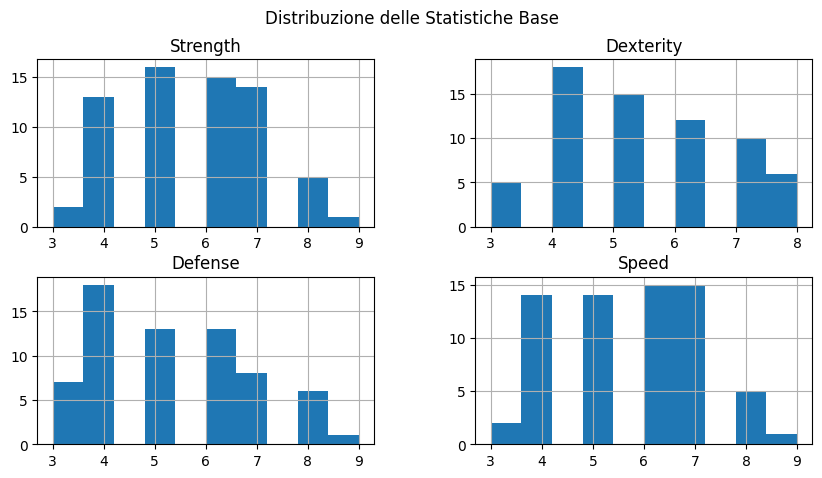

In [7]:
stats = ['Strength', 'Dexterity', 'Defense', 'Speed']
df[stats].hist(figsize=(10,5), bins=10)
plt.suptitle("Distribuzione delle Statistiche Base")
plt.show()

#### Distribuzione Winrate nelle partite classificate e confronto tra winrate e playrate

Text(0.5, 1.0, 'Distribuzione del Winrate Ranked')

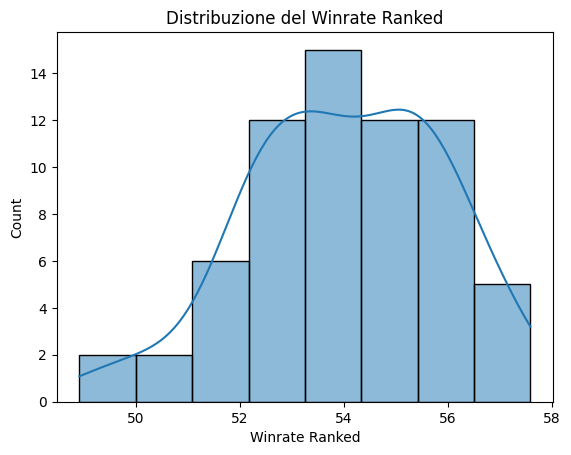

In [8]:
sns.histplot(df['Winrate Ranked'], kde=True)
plt.title("Distribuzione del Winrate Ranked")

Text(0.5, 1.0, 'Playrate vs Winrate')

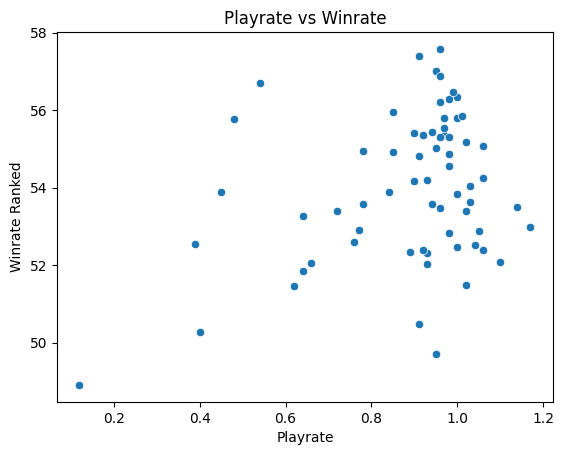

In [9]:
sns.scatterplot(data=df, x="Playrate", y="Winrate Ranked")
plt.title("Playrate vs Winrate")


#### Heatmap che mostra la relazione tra le varie caratteristiche con le vittorie e altri dati in-game

Text(0.5, 1.0, 'Matrice di Correlazione')

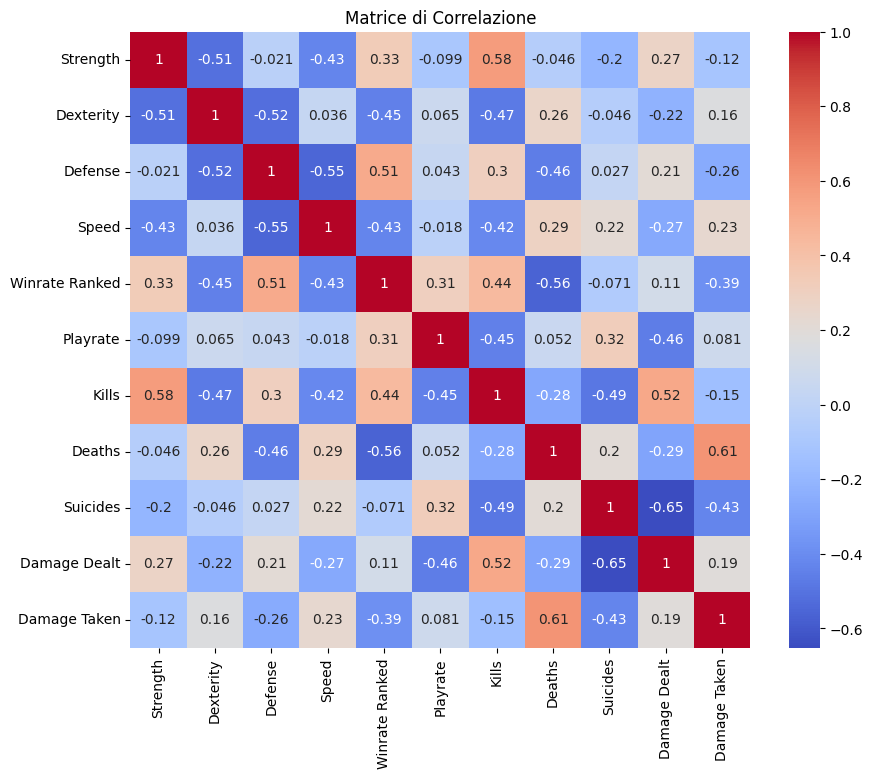

In [10]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice di Correlazione")


###### Facendo focus sulle statistiche...

In [11]:
corr_matrix = df[stats + ['Winrate Ranked']].corr()
print(corr_matrix)


                Strength  Dexterity   Defense     Speed  Winrate Ranked
Strength        1.000000  -0.510466 -0.021421 -0.429951        0.331008
Dexterity      -0.510466   1.000000 -0.516712  0.035571       -0.450032
Defense        -0.021421  -0.516712  1.000000 -0.551909        0.514375
Speed          -0.429951   0.035571 -0.551909  1.000000       -0.429026
Winrate Ranked  0.331008  -0.450032  0.514375 -0.429026        1.000000


#### Regressione lineare per ogni statistica con il Winrate

In [12]:
X = df[['Strength', 'Dexterity', 'Defense', 'Speed']]
y = df['Winrate Ranked']

model = LinearRegression()  
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.19443363 -0.28648405  0.36209327 -0.27004285]
Intercept: 54.05886870606054


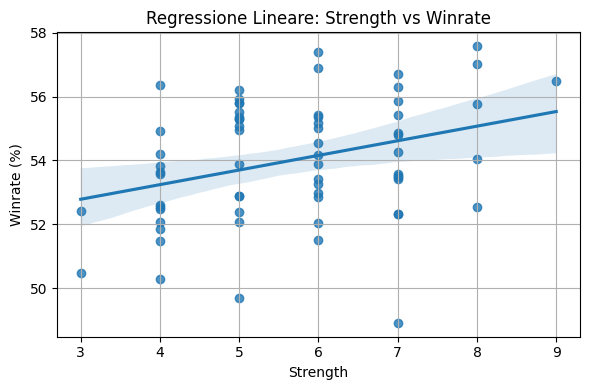

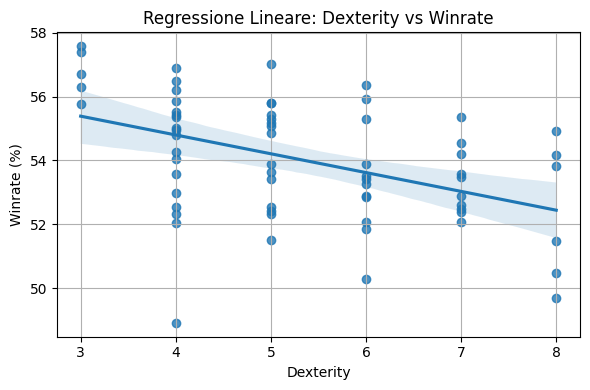

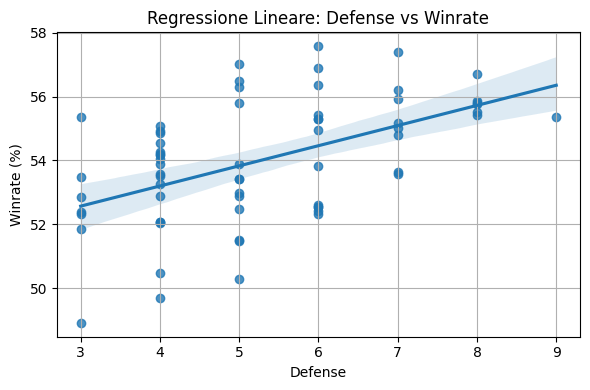

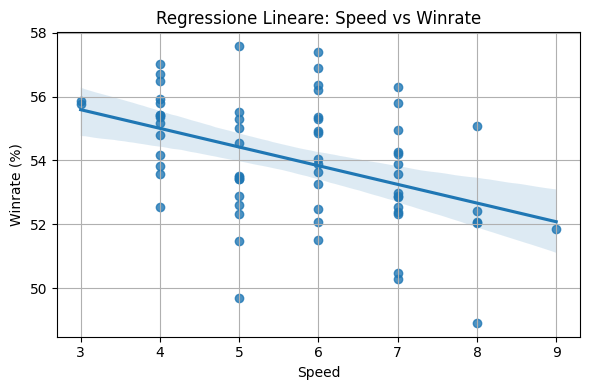

In [13]:
for i in stats:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=i, y='Winrate Ranked', data=df)
    plt.title(f'Regressione Lineare: {i} vs Winrate')
    plt.xlabel(i)
    plt.ylabel('Winrate (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

####   Distribuzione delle armi tra le leggende e ricerca di qualche correlazione con il winrate

######  Unisco Weapon1 e Weapon2 in un'unica serie e conteggio delle occorrenze di ogni arma

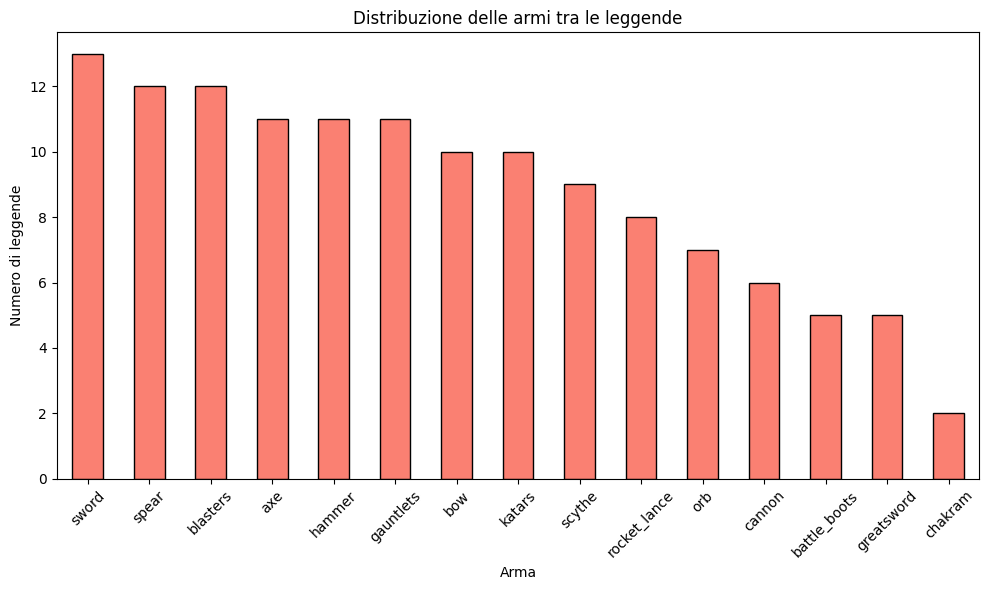

In [14]:
all_weapons = pd.concat([df['Weapon1'], df['Weapon2']])

weapon_counts = all_weapons.value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
weapon_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Distribuzione delle armi tra le leggende")
plt.ylabel("Numero di leggende")
plt.xlabel("Arma")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

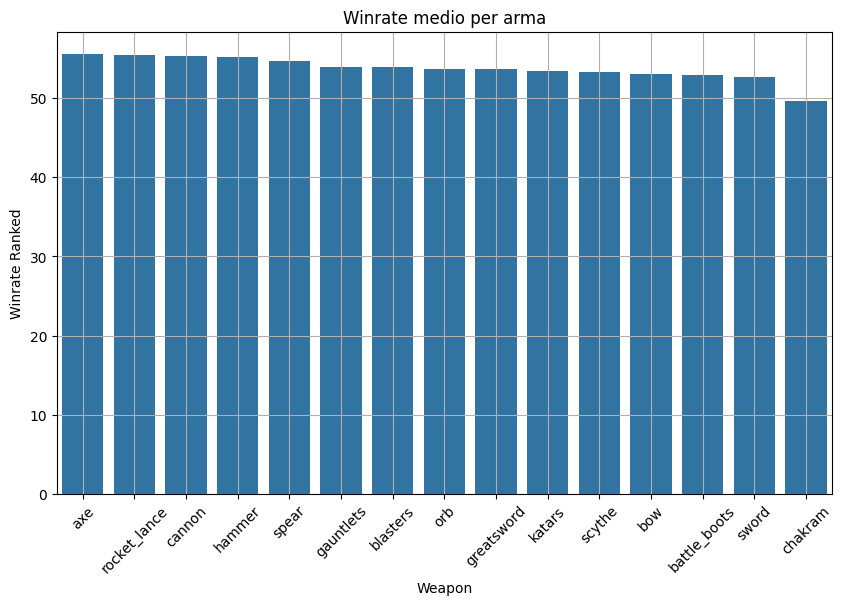

In [15]:

weapon_winrates = pd.concat([
    df[['Legend', 'Weapon1', 'Winrate Ranked']].rename(columns={'Weapon1': 'Weapon'}),
    df[['Legend', 'Weapon2', 'Winrate Ranked']].rename(columns={'Weapon2': 'Weapon'})
])

weapon_avg = weapon_winrates.groupby('Weapon')['Winrate Ranked'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Weapon', y='Winrate Ranked', data=weapon_avg)
plt.title('Winrate medio per arma')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Analisi influenza nel winrate di statistiche e armi (Prendendo i 2 casi più evidenti)

Coefficients: [ 0.11660496 -0.56271     0.09646174  0.34964331]
Intercept: 55.32397391742618


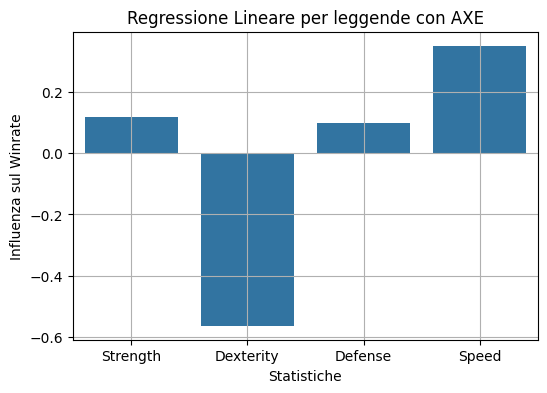

In [16]:
axe_df = df[(df['Weapon1'] == 'axe') | (df['Weapon2'] == 'axe')]

X_axe = axe_df[['Strength', 'Dexterity', 'Defense', 'Speed']]
y_axe = axe_df['Winrate Ranked']

model_axe = LinearRegression()
model_axe.fit(X_axe, y_axe)

print("Coefficients:", model_axe.coef_)
print("Intercept:", model_axe.intercept_)

plt.figure(figsize=(6,4))
sns.barplot(x=X_axe.columns, y=model_axe.coef_)
plt.title('Regressione Lineare per leggende con AXE')
plt.ylabel('Influenza sul Winrate')
plt.xlabel('Statistiche')
plt.grid(True)
plt.show()
    

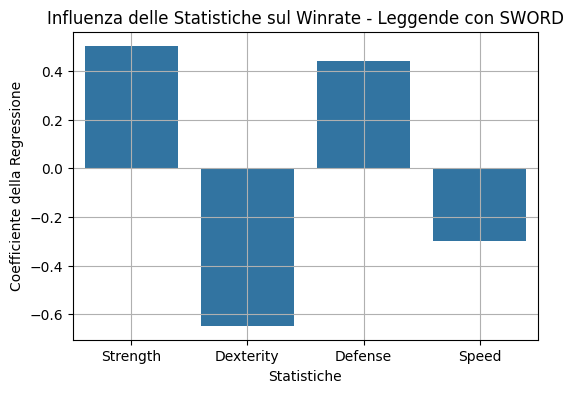

In [17]:

sword_df = df[(df['Weapon1'] == 'sword') | (df['Weapon2'] == 'sword')]

X_sword = sword_df[['Strength', 'Dexterity', 'Defense', 'Speed']]
y_sword = sword_df['Winrate Ranked']

model_sword = LinearRegression()
model_sword.fit(X_sword, y_sword)

plt.figure(figsize=(6, 4))
sns.barplot(x=X_sword.columns, y=model_sword.coef_)
plt.title('Influenza delle Statistiche sul Winrate - Leggende con SWORD')
plt.ylabel('Coefficiente della Regressione')
plt.xlabel('Statistiche')
plt.grid(True)
plt.show()

    

#### Prova finale che le statistiche e le armi hanno influenza sul winrate

Statistiche delle leggende con Winrate più ALTO:
     Legend  Strength  Dexterity  Defense  Speed
52    Teros         8          3        6      5
57   Ulgrim         6          3        7      6
47  Scarlet         8          5        5      4
50    Sidra         6          4        6      6
49    Seven         7          3        8      4

Statistiche delle leggende con Winrate più BASSO:
     Legend  Strength  Dexterity  Defense  Speed
28     Loki         4          8        5      5
27  Lin Fei         3          8        4      7
40    Priya         4          6        5      7
25     Koji         5          8        4      5
43   Ransom         7          4        3      8


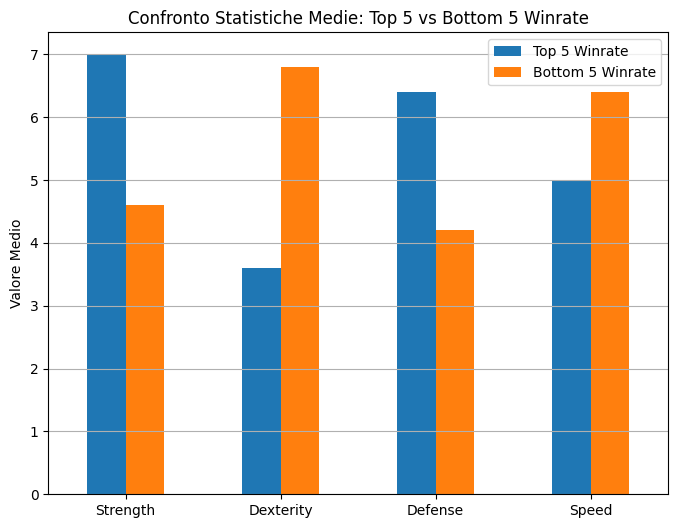

In [19]:

sorted_df = df.sort_values(by='Winrate Ranked', ascending=False)
top5 = sorted_df.head(5)
bot5 = sorted_df.tail(5)


print("Statistiche delle leggende con Winrate più ALTO:")
print(top5[['Legend', 'Strength', 'Dexterity', 'Defense', 'Speed']])

print("\nStatistiche delle leggende con Winrate più BASSO:")
print(bot5[['Legend', 'Strength', 'Dexterity', 'Defense', 'Speed']])

top_stats = top5[['Strength', 'Dexterity', 'Defense', 'Speed']].mean()
bottom_stats = bot5[['Strength', 'Dexterity', 'Defense', 'Speed']].mean()


stats_compare = pd.DataFrame({'Top 5 Winrate': top_stats, 'Bottom 5 Winrate': bottom_stats})


stats_compare.plot(kind='bar', figsize=(8, 6))
plt.title('Confronto Statistiche Medie: Top 5 vs Bottom 5 Winrate')
plt.ylabel('Valore Medio')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

